<a href="https://colab.research.google.com/github/SiddhantVitragiJain/BlackFridayPricePrediction/blob/main/PythonBlackFridaySalesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

#Interactive Plots library
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

In [ ]:
url="https://raw.githubusercontent.com/SiddhantVitragiJain/BlackFridayPricePrediction/main/AVBlackFriday.csv"
df = pd.read_csv(url)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Steps in Data Exploration and Preprocessing:


1.   Identification of variables and data types
2.   Analyzing the basic metrics
3.   Analyzing the basic metrics
4.   Non-Graphical Univariate Analysis
5.   Graphical Univariate Analysis
6.   Bivariate Analysis
7.   Variable transformations
8.   Missing value treatment
9.   Outlier treatment
10.  Correlation Analysis

In [ ]:
#General info about the data set 
df.info()
#It is having **550068** entries and total 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


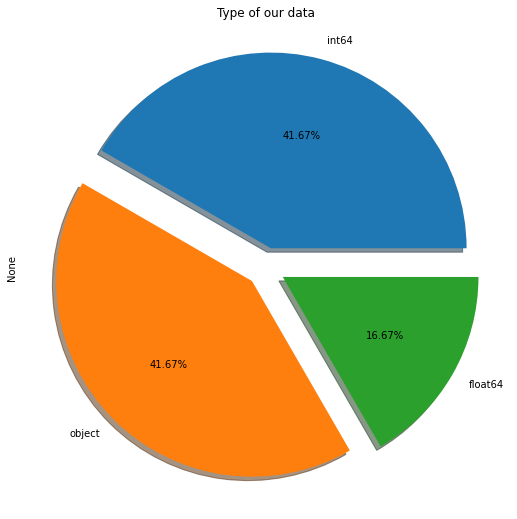

In [ ]:
#Plotting Our data types Availabe
df.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('Type of our data');

In [ ]:
#General statistics of our raw data 
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
#Checking if there are any null values 
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [ ]:
#Taking the total of null values

missing_values=df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values':missing_values,
    'percent_missing':percent_missing
}
frame=pd.DataFrame(value)
frame
#We are having null values only in Product_Category_2 and Product_Category_3 Category

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


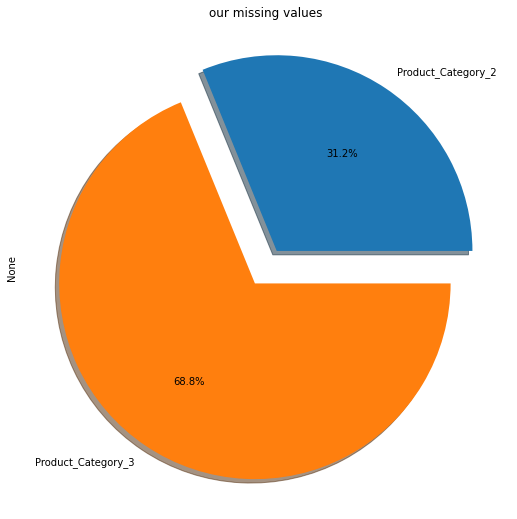

In [ ]:
#Plotting missing values in pie chart
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('our missing values');

In [ ]:
# Replace using median 
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [ ]:
# drop Product_Category_3 
df.drop('Product_Category_3',axis=1,inplace=True)
df.columns

In [ ]:
#Checking if there are more missing values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

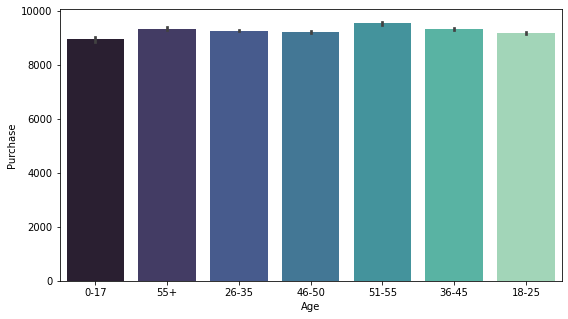

In [ ]:
#Average Purchase accross the age
plt.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x='Age',y='Purchase',data=df,palette='mako')

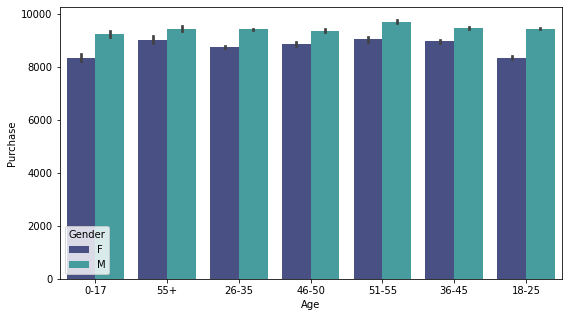

In [ ]:
#Across all the age groups male purchase more than female 
plt.rcParams['figure.figsize'] = (9, 5)
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender',palette='mako')

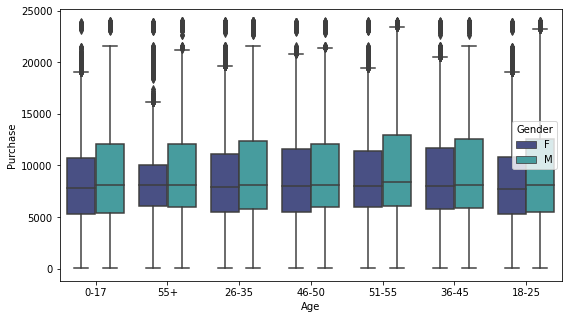

In [ ]:
#Depicts the Purchase outlier across all age groups
plt.rcParams['figure.figsize'] = (9,5)
sns.boxplot(x='Age',y='Purchase',data=df,hue='Gender',palette='mako')

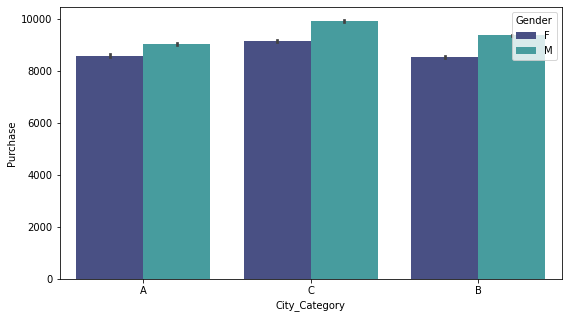

In [ ]:
#People belong to City Category is having more average purchase than other cities
plt.rcParams['figure.figsize'] = (9,5)
sns.barplot(x='City_Category',y='Purchase',data=df,hue='Gender',palette='mako')

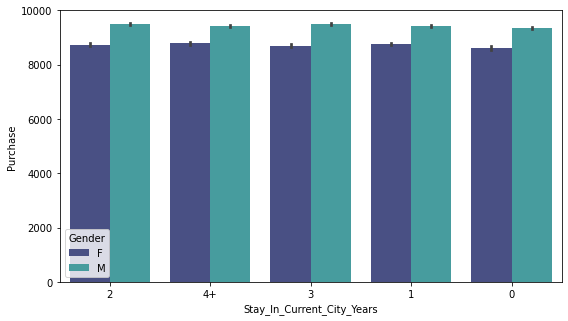

In [ ]:
#Stay in current city years not affects the puchase behaviours
plt.rcParams['figure.figsize'] = (9,5)
sns.barplot(x='Stay_In_Current_City_Years',y='Purchase',data=df,hue='Gender',palette='mako')

In [ ]:
sns.pairplot(df,hue='Gender',palette='mako')


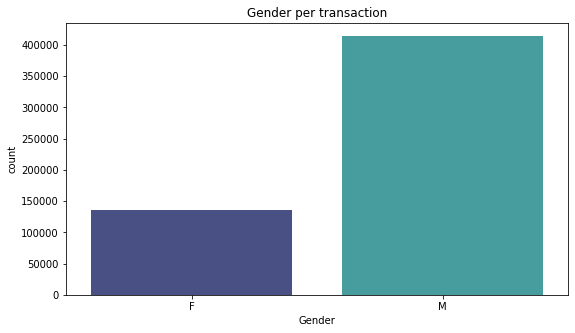

In [ ]:
#Total count of transaction
sns.countplot(x=df.Gender,palette='mako')
plt.title('Gender per transaction');

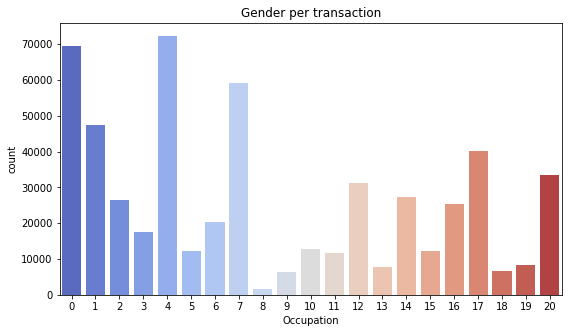

In [ ]:
plt.rcParams['figure.figsize'] = (9,5)
sns.countplot(x=df.Occupation,palette='coolwarm')
plt.title('Gender per transaction');

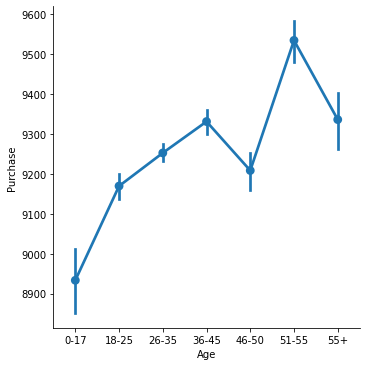

In [ ]:
#Variable - Age Vs Purchase
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],)

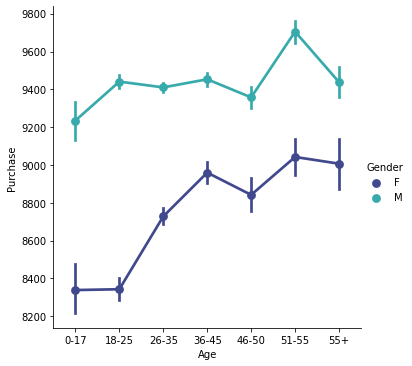

In [ ]:
#Variable - Age Vs Purchase with hue = Gender
#Catplot Age+Purchase
sns.catplot(x='Age',y='Purchase',kind='point',data=df, order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],hue='Gender',palette='mako')

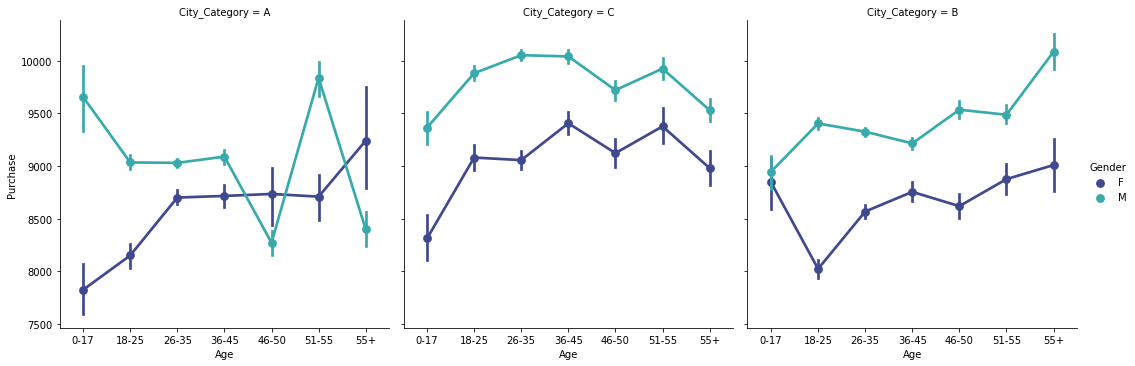

In [ ]:
#Catplot Age+Purchase+City_Category+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='City_Category',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],palette='mako')

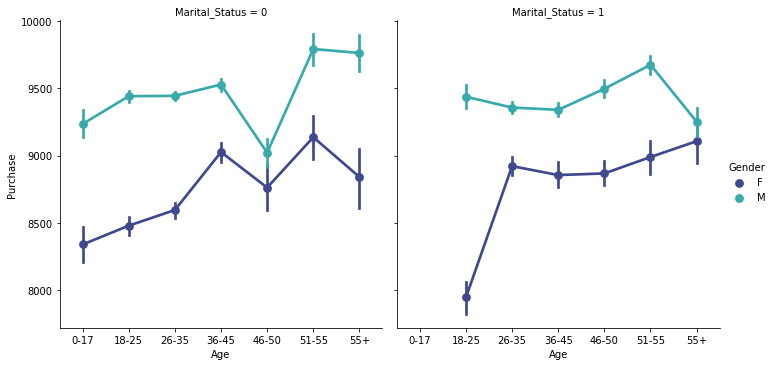

In [ ]:
#Catplot Age+Purchase+Marital_Status+Gender
sns.catplot(x='Age',y='Purchase',kind='point',data=df,col='Marital_Status',hue='Gender', order=['0-17', '18-25', '26-35', '36-45',  '46-50', '51-55', '55+'],palette='mako')

# Model Building

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [ ]:
#Creating Backup Before final modelling
df_backup = df.copy()


In [ ]:
#Dropping irrelevant column - UserID and Product ID
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


In [ ]:
#Encoding variables
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

data_final = pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)
data_final

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,36-45,46-50,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,9.0,368,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
550064,F,26-35,1,C,3,0,20,9.0,371,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
550065,F,26-35,15,B,4+,1,20,9.0,137,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
550066,F,55+,1,C,2,0,20,9.0,365,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
#Dropping old rows from final data frame
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
data_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Occupation          550068 non-null  int64  
 1   Marital_Status      550068 non-null  int64  
 2   Product_Category_1  550068 non-null  int64  
 3   Product_Category_2  550068 non-null  float64
 4   Purchase            550068 non-null  int64  
 5   F                   550068 non-null  uint8  
 6   M                   550068 non-null  uint8  
 7   0-17                550068 non-null  uint8  
 8   18-25               550068 non-null  uint8  
 9   26-35               550068 non-null  uint8  
 10  36-45               550068 non-null  uint8  
 11  46-50               550068 non-null  uint8  
 12  51-55               550068 non-null  uint8  
 13  55+                 550068 non-null  uint8  
 14  A                   550068 non-null  uint8  
 15  B                   550068 non-nul

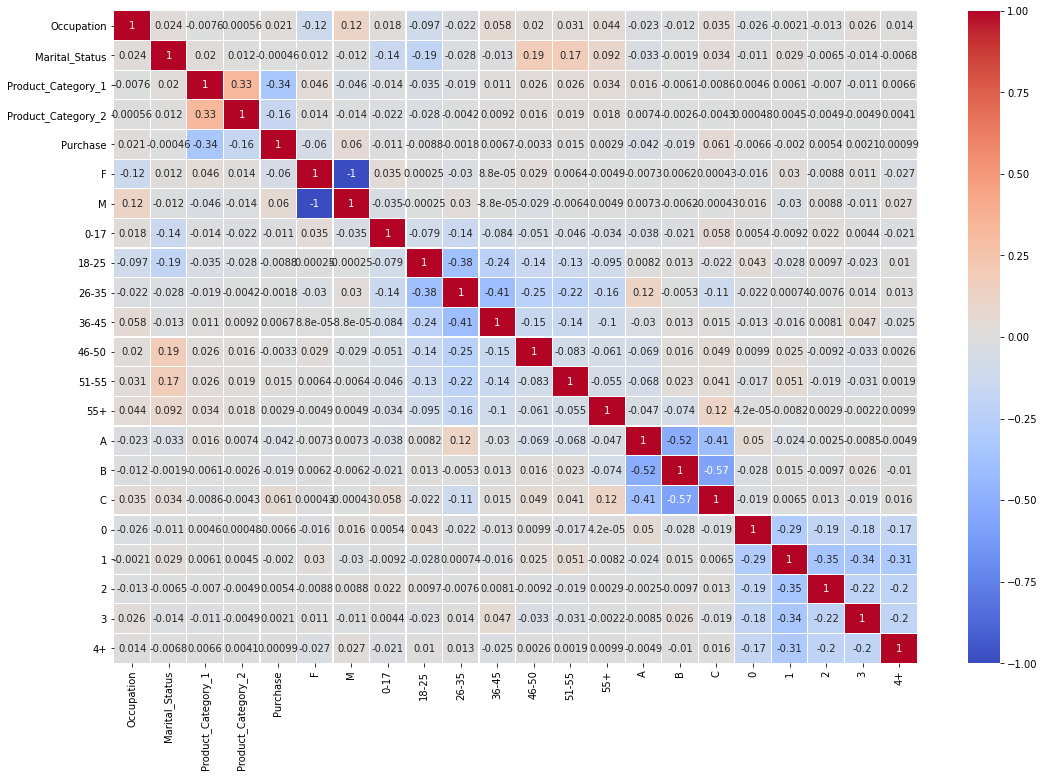

In [161]:
#Lets do a correlation plot for entire dataframe
sns.heatmap(data_final.corr(),annot=True,cmap='coolwarm',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(18,12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [151]:
#Final Backup
data_final_backup = data_final.copy()

# Splitting the data
Import Sklearn


In [145]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [149]:
X=data_final.drop('Purchase',axis=1)
y=data_final.Purchase

In [150]:
print(X.shape)
print(y.shape)

(550068, 21)
(550068,)


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [153]:
#Scaling our data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model 

In [155]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.fit(X_train, y_train))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
lm.score(X_train,y_train)*100

12.658888956946846

In [162]:
print('Intercept parameter:', lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

Intercept parameter: 9263.189892555252
                     Coefficient
Occupation          4.206480e+01
Marital_Status     -2.779674e+01
Product_Category_1 -1.634338e+03
Product_Category_2 -2.574449e+02
F                   1.456174e+15
M                   1.456174e+15
0-17               -5.248668e+15
18-25              -1.242597e+16
26-35              -1.579133e+16
36-45              -1.290323e+16
46-50              -8.896974e+15
51-55              -8.213369e+15
55+                -6.254605e+15
A                   2.527049e+16
B                   2.812774e+16
C                   2.639185e+16
0                  -8.282101e+15
1                  -1.156881e+16
2                  -9.408362e+15
3                  -9.166006e+15
4+                 -8.735416e+15


In [164]:
#Prediction with X_test
predictions = lm.predict(X_test)
print("Predicted purchases (in dollars) for new costumers:", predictions)

Predicted purchases (in dollars) for new costumers: [ 7153.68989256 11496.68989256  9201.68989256 ...  9231.18989256
 10488.30895472  6979.14809891]


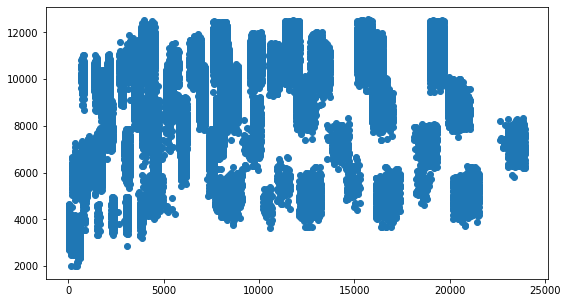

In [165]:
#Comparing y_test which is correct proces with predicted prices which we got above

#USing Scatter plot for comapring

plt.scatter(y_test,predictions)
#Linear relationship shows our model have predicted right values


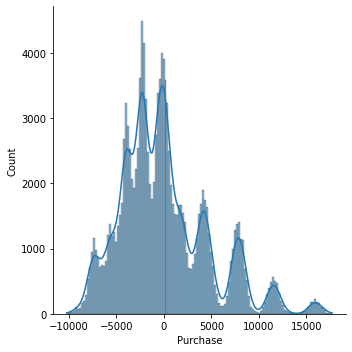

In [169]:
#Distrubution of our residuals
sns.displot((y_test-predictions),kde=True)
#If wer have normally distributed residuals it means mopdel was correct choice for data


In [175]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 3604.3504643783517
MSE: 22121435.75656117
RMSE: 4703.343040493769
